In [128]:
from sqlalchemy import create_engine
import pymysql
from urllib.parse import quote
import pandas as pd
import tkinter, tkinter.ttk, pymysql, paramiko
from tkcalendar import Calendar
from sshtunnel import SSHTunnelForwarder
from sqlalchemy import create_engine
import time
from tqdm import tqdm
from datetime import datetime, date, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import cm
import random
from sklearn.preprocessing import MinMaxScaler
from kmeans_interp.kmeans_feature_imp import KMeansInterp
random.seed(0)

In [129]:
pkeyfilepath = '/Users/gitple/.ssh/id_rsa' ######################### ssh_key.pem 파일 경로 넣으시면 됩니다.
mypkey = paramiko.RSAKey.from_private_key_file(pkeyfilepath)
sql_hostname = 'db-8j8d2-fkr.cdb.fin-ntruss.com'
sql_username = 'wkdtjdgus2142'            ######################### sql_username 입력하시면 됩니다.
sql_password = '?!0hLtR$_i8onochu=aC'            ######################### sql_password 입력하시면 됩니다.
sql_main_database = 'betterday_db'
sql_port = 3306
ssh_host = '10.0.1.14'
ssh_user = 'wkdtjdgus2142'                ######################### ssh_user 입력하시면 됩니다.
ssh_port = 22

# soslSuregi97o#rop0n0

In [130]:
css_all = pd.read_csv('../페니로이스/css_data/CSS_ALL.csv').set_index("ID")

css_all = css_all[['CSS_BANK_9(A.ID)','CSS_BANK_10(A.ID)','CSS_BANK_11(A.ID)','CSS_CARD_1(A.ID)','CSS_CARD_2(A.ID)','CSS_CARD_3(A.ID)',
        'CSS_CARD_4(A.ID)','CSS_CARD_5(A.ID)','CSS_BANK_15(A.ID)','CSS_BANK_59(A.ID)','CSS_BANK_60(A.ID)',
         'CSS_BANK_61(A.ID)','CSS_BANK_62(A.ID)','CSS_BANK_63(A.ID)','CSS_BANK_64(A.ID)','CSS_BANK_117(A.ID)','CSS_BANK_119(A.ID)',
         'CSS_BANK_120(A.ID)','CSS_BANK_121(A.ID)','CSS_BANK_122(A.ID)','CSS_CARD_37(A.ID)','CSS_CARD_38(A.ID)','CSS_CARD_39(A.ID)',
        'CSS_CARD_40(A.ID)','CSS_CARD_41(A.ID)','CSS_CARD_42(A.ID)','CSS_CARD_55(A.ID)','CSS_CARD_56(A.ID)','CSS_CARD_57(A.ID)',
        'CSS_INS_1(A.ID)','CSS_INS_3(A.ID)','CSS_INS_4(A.ID)','CSS_INS_5(A.ID)','CSS_INS_19(A.ID)','CSS_INS_20(A.ID)']]
css_all = css_all.dropna()

css_all['예적금계좌보유'] = css_all['CSS_BANK_9(A.ID)']
css_all['투자계좌보유'] = css_all['CSS_BANK_10(A.ID)']
css_all['계좌액수'] = css_all['CSS_BANK_15(A.ID)']
css_all['잔액0횟수'] =  css_all['CSS_BANK_59(A.ID)']+css_all['CSS_BANK_60(A.ID)']+css_all['CSS_BANK_61(A.ID)']+css_all['CSS_BANK_62(A.ID)']+css_all['CSS_BANK_63(A.ID)']+css_all['CSS_BANK_64(A.ID)']
# css_all['신규투자건수'] = css_all['CSS_BANK_117(A.ID)']
css_all['대출금리건수'] = css_all['CSS_BANK_119(A.ID)']+css_all['CSS_BANK_120(A.ID)']+css_all['CSS_BANK_121(A.ID)']+css_all['CSS_BANK_122(A.ID)']

css_all['카드보유수'] = css_all['CSS_CARD_1(A.ID)']
css_all['보유카드기관'] = css_all['CSS_CARD_2(A.ID)']
css_all['신용카드보유수'] = css_all['CSS_CARD_3(A.ID)']
css_all['체크카드보유수'] = css_all['CSS_CARD_4(A.ID)']
css_all['소액카드보유수'] = css_all['CSS_CARD_5(A.ID)']
css_all['국내카드사 이용수'] =  css_all['CSS_CARD_37(A.ID)']+css_all['CSS_CARD_38(A.ID)']+css_all['CSS_CARD_39(A.ID)']+css_all['CSS_CARD_40(A.ID)']+css_all['CSS_CARD_41(A.ID)']+css_all['CSS_CARD_42(A.ID)']
css_all['평일(18-06)이용건수'] =  css_all['CSS_CARD_55(A.ID)']+css_all['CSS_CARD_56(A.ID)']+css_all['CSS_CARD_57(A.ID)']

css_all['총보험'] = css_all['CSS_INS_1(A.ID)']
# css_all['건강보험'] = css_all['CSS_INS_3(A.ID)']
# css_all['저축성보험'] = css_all['CSS_INS_4(A.ID)']
# css_all['연금보험'] = css_all['CSS_INS_5(A.ID)']
# css_all['보험대출'] = css_all['CSS_INS_19(A.ID)']
# css_all['보험계약대출'] = css_all['CSS_INS_20(A.ID)']

In [131]:
data = css_all.iloc[:,35:]

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3957 entries, 10 to 7138
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   예적금계좌보유        3957 non-null   int64  
 1   투자계좌보유         3957 non-null   int64  
 2   계좌액수           3957 non-null   float64
 3   잔액0횟수          3957 non-null   float64
 4   대출금리건수         3957 non-null   int64  
 5   카드보유수          3957 non-null   int64  
 6   보유카드기관         3957 non-null   int64  
 7   신용카드보유수        3957 non-null   int64  
 8   체크카드보유수        3957 non-null   int64  
 9   소액카드보유수        3957 non-null   int64  
 10  국내카드사 이용수      3957 non-null   int64  
 11  평일(18-06)이용건수  3957 non-null   int64  
 12  총보험            3957 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 432.8 KB


In [133]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT * FROM 
            BDAY_CUST;
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            cust = cur.fetchall()

I'm running
1559
I'm running
1560


In [134]:
cust = pd.DataFrame(cust).iloc[:,[0,5,6]]
cust.columns = ['ID','age','gender']

In [135]:
data = pd.merge(cust, data, how='inner', on='ID')

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3929 entries, 0 to 3928
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             3929 non-null   int64  
 1   age            3929 non-null   object 
 2   gender         3929 non-null   object 
 3   예적금계좌보유        3929 non-null   int64  
 4   투자계좌보유         3929 non-null   int64  
 5   계좌액수           3929 non-null   float64
 6   잔액0횟수          3929 non-null   float64
 7   대출금리건수         3929 non-null   int64  
 8   카드보유수          3929 non-null   int64  
 9   보유카드기관         3929 non-null   int64  
 10  신용카드보유수        3929 non-null   int64  
 11  체크카드보유수        3929 non-null   int64  
 12  소액카드보유수        3929 non-null   int64  
 13  국내카드사 이용수      3929 non-null   int64  
 14  평일(18-06)이용건수  3929 non-null   int64  
 15  총보험            3929 non-null   int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 521.8+ KB


In [137]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT mut.BDAY_CUST_ID, COUNT(*) FROM MD_BANK_ACCOUNTS mba , MD_USER_TOKEN mut
            WHERE mba.TOKEN_ID = mut.ID AND IS_CONSENT =1 AND ACCOUNT_STATUS =1
            GROUP BY mut.BDAY_CUST_ID;
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            data2 = cur.fetchall()

I'm running
1559
I'm running
1560


In [138]:
data2 = pd.DataFrame(data2)
data2.columns = ['ID','계좌보유건수']

In [139]:
data = pd.merge(data, data2, how='inner', on='ID')

In [140]:
data['age']=data.age.apply(lambda x: 2022 -x.year)

In [141]:
data = data[data['계좌액수'] < np.quantile(data['계좌액수'],0.95)]
data['gender'] = data.gender.apply(lambda x: 0 if x=='M' else 1)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3729 entries, 0 to 3925
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             3729 non-null   int64  
 1   age            3729 non-null   int64  
 2   gender         3729 non-null   int64  
 3   예적금계좌보유        3729 non-null   int64  
 4   투자계좌보유         3729 non-null   int64  
 5   계좌액수           3729 non-null   float64
 6   잔액0횟수          3729 non-null   float64
 7   대출금리건수         3729 non-null   int64  
 8   카드보유수          3729 non-null   int64  
 9   보유카드기관         3729 non-null   int64  
 10  신용카드보유수        3729 non-null   int64  
 11  체크카드보유수        3729 non-null   int64  
 12  소액카드보유수        3729 non-null   int64  
 13  국내카드사 이용수      3729 non-null   int64  
 14  평일(18-06)이용건수  3729 non-null   int64  
 15  총보험            3729 non-null   int64  
 16  계좌보유건수         3729 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 524.4 KB


In [143]:
data1 = data.iloc[:,3:]

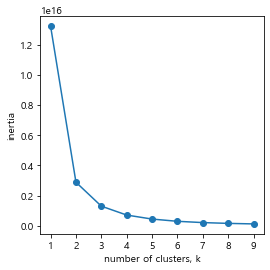

In [144]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data1)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data1))

kmeans = KMeans(n_clusters = 2, random_state=0)
kmeans.fit(scaled_df)
data1['cluster'] = kmeans.labels_
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1]), array([3225,  504], dtype=int64))


In [146]:
data1.cluster.value_counts()

0    3225
1     504
Name: cluster, dtype: int64

Feature-important

In [147]:
scaled_df.columns = data1.drop('cluster',axis=1).columns

In [148]:
X1 = scaled_df # DataFrame is an example to deliver the idea of features order

kms = KMeansInterp(n_clusters=3,ordered_feature_names=X1.columns.tolist(), feature_importance_method='wcss_min', # or 'unsup2sup'
).fit(X1.values)

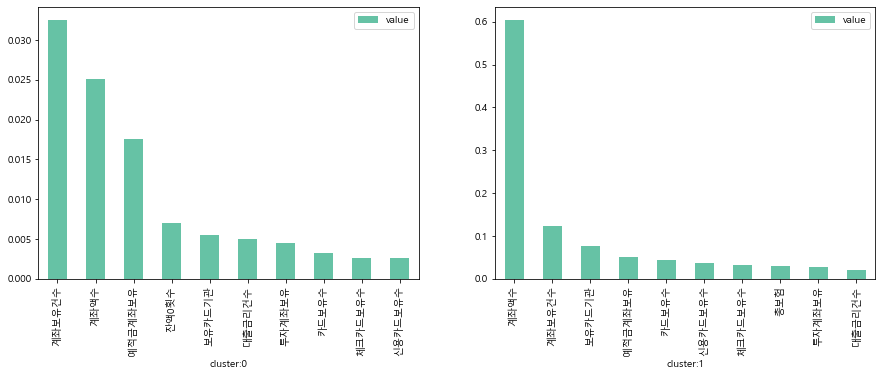

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.rcParams['font.family']='Malgun Gothic'
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(2):
    ax = axes[i]
    aa = pd.DataFrame(kms.feature_importances_[i][:10])
    aa.columns = ['feature','value']
    aa=aa.set_index('feature')
    aa.plot.bar(ax=ax, color = colors)
    ax.set(xlabel='cluster:{}'.format(i))
plt.show()

In [150]:
data['cluster']=data1['cluster']

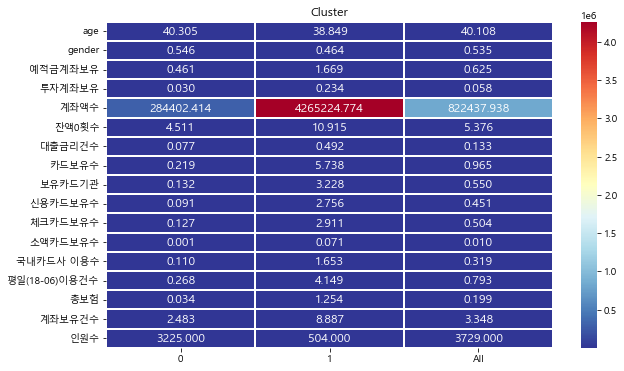

In [151]:
#cust_dummy = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv', 'pur6_bin'])
aa = data1.cluster.value_counts().reset_index()
aa.columns = ['cluster','인원수']
temp = data.iloc[:,1:].groupby(['cluster']).mean()
temp = pd.merge(temp, aa, on='cluster').set_index('cluster')
temp_aa = pd.concat([temp.T, data.iloc[:,1:].mean()],axis=1).fillna(data.shape[0]).drop('cluster',axis=0)
temp_aa.columns = [0,1,'All']
# mean_table = cluster_mean.div(data.iloc[:,1:-1].mean(axis=0), axis=0)
# mean_table = mean_table.iloc[1:]

plt.figure(figsize = (10, 6))
plt.rcParams['font.family']='Malgun Gothic'
annot_kws = {'fontsize':12}
sns.heatmap(temp_aa,
           annot=True,
           fmt='.3f',
           linewidths=0.1,
           annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.title('Cluster')
plt.show()

# 2번 고객의 나이 평균이 높다
# 계좌 총 잔액의 경우 1번 고객이 평균이 가장 높다
# 0번과 2번은 나이가 차이나고, 잔액이 0인 횟수가 차이난다. 
# 이용카드사와 계좌보유, 계좌 총 잔액은 1인 고객이 많다

## 전체 고객에 대한 클러스터링
#### 군집 갯수 : 2개

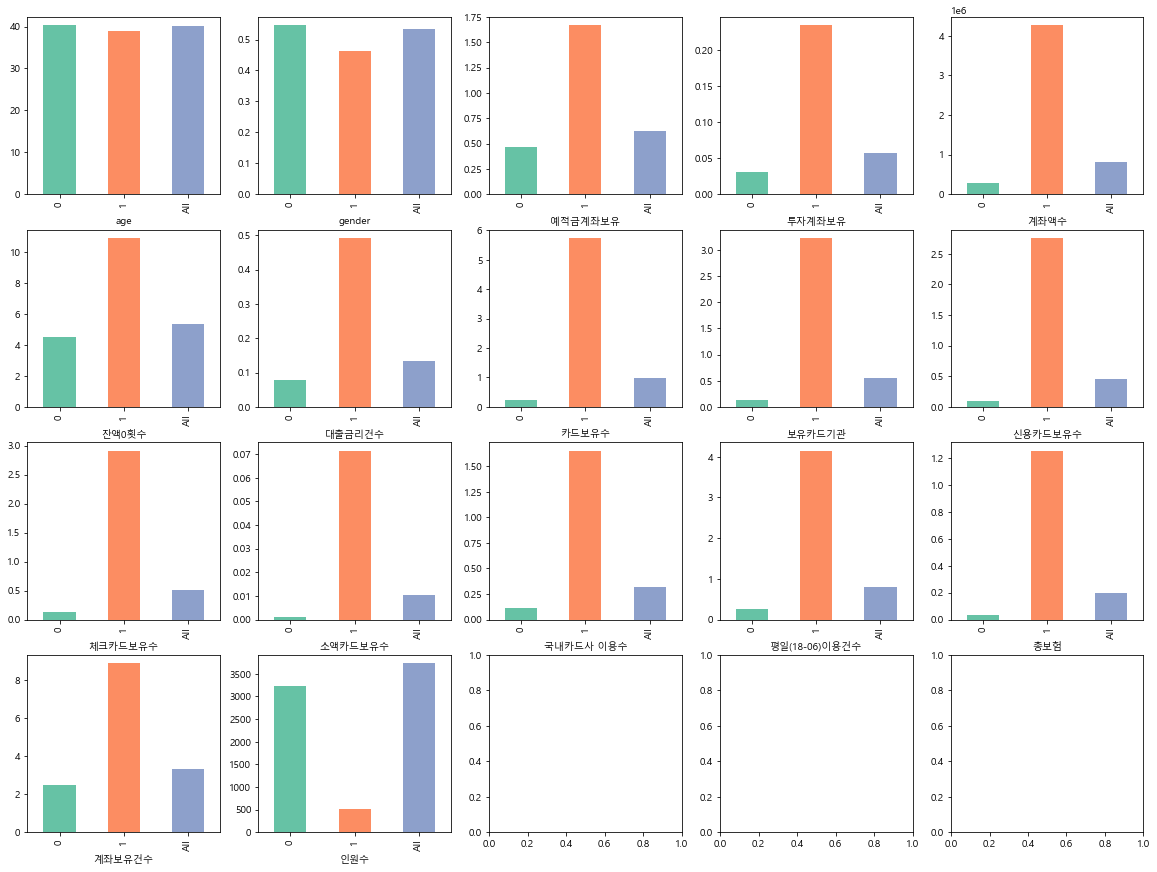

In [152]:
fig, axes = plt.subplots(4, 5, figsize=(20,15))
colors=cm.get_cmap('Set2')(np.arange(7))
plt.rcParams['font.family']='Malgun Gothic'

for i in range(temp_aa.shape[0]):
    if i<5:
        ax = axes[0,i]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
    elif i<10:
        ax = axes[1,i-5]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
    elif i<15:
        ax = axes[2,i-10]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
    else:
        ax = axes[3,i-15]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
        
parameters = {'axes.labelsize':10}
plt.rcParams.update(parameters)
plt.show()

0번 고객은 8월 이벤트로 유입된 고객(체리피커)\
1번과 2번은 활성화 되어있는 유의미한 고객

### 고객들(군집별)의 인구통계 분포

In [153]:
data_all = data.copy()

data_all['year_ca']=data_all.age.apply(lambda x: '20대' if x<30 else '30대' if x<40 else '40대' if x<50 else '50대' if x<60 else '60대' if x< 70 else '60대 이상')
data_all['gender_ca']=data_all.gender.apply(lambda x: '남성' if x==0 else '여성')

In [154]:
data_copy_0 = data_all[data_all.cluster==0]

In [155]:
data_copy_1 = data_all[data_all.cluster==1]

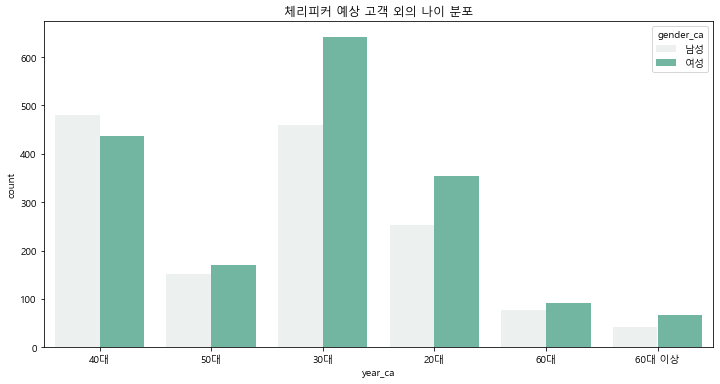

In [156]:
fig,ax = plt.subplots(figsize=(12,6))
colors=cm.get_cmap('Set2')(np.arange(1))
plt.rcParams['font.family']='Malgun Gothic'

sns.countplot(x='year_ca', hue='gender_ca', data=data_copy_0, color=colors) 
plt.title('체리피커 예상 고객 외의 나이 분포')
plt.show()

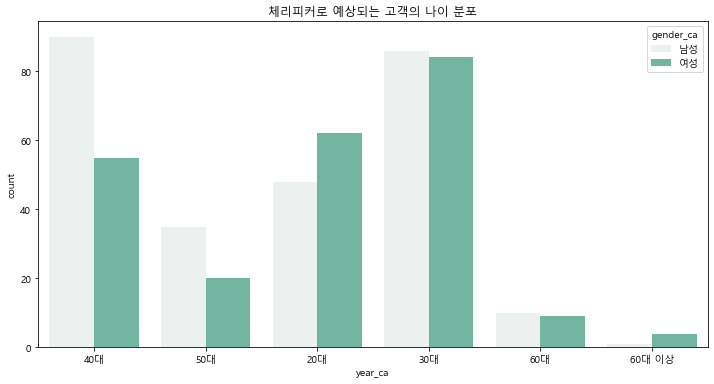

In [157]:
fig,ax = plt.subplots(figsize=(12,6))
colors=cm.get_cmap('Set2')(np.arange(1))
plt.rcParams['font.family']='Malgun Gothic'

sns.countplot(x='year_ca', hue='gender_ca', data=data_copy_1, color=colors) 
plt.title('체리피커로 예상되는 고객의 나이 분포')
plt.show()

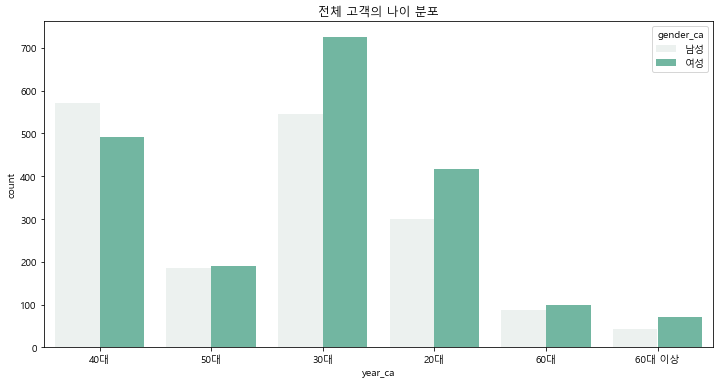

In [158]:
fig,ax = plt.subplots(figsize=(12,6))
colors=cm.get_cmap('Set2')(np.arange(1))
plt.rcParams['font.family']='Malgun Gothic'

sns.countplot(x='year_ca', hue='gender_ca', data=data_all, color=colors) 
plt.title('전체 고객의 나이 분포')
plt.show()

### 1,2 고객(활발한 고객)에 대한 군집화

### 체리피커로 예상되지 않는 고객에 대한 군집화

- 연결된 금융자산이 어떤 카테고리에 치우쳐져 있는지(예금, 적금 등등) 파악

In [159]:
data_use=data.query('cluster==1')

In [160]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT mut.BDAY_CUST_ID, mba.ACCOUNT_TYPE FROM MD_BANK_ACCOUNTS mba, MD_USER_TOKEN mut
            WHERE mba.TOKEN_ID = mut.ID;
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            data4 = cur.fetchall()

I'm running
1559
I'm running
1560


In [161]:
data4 = pd.DataFrame(data4)
data4.columns = ['ID','prod_code']

![image.png](attachment:image.png )
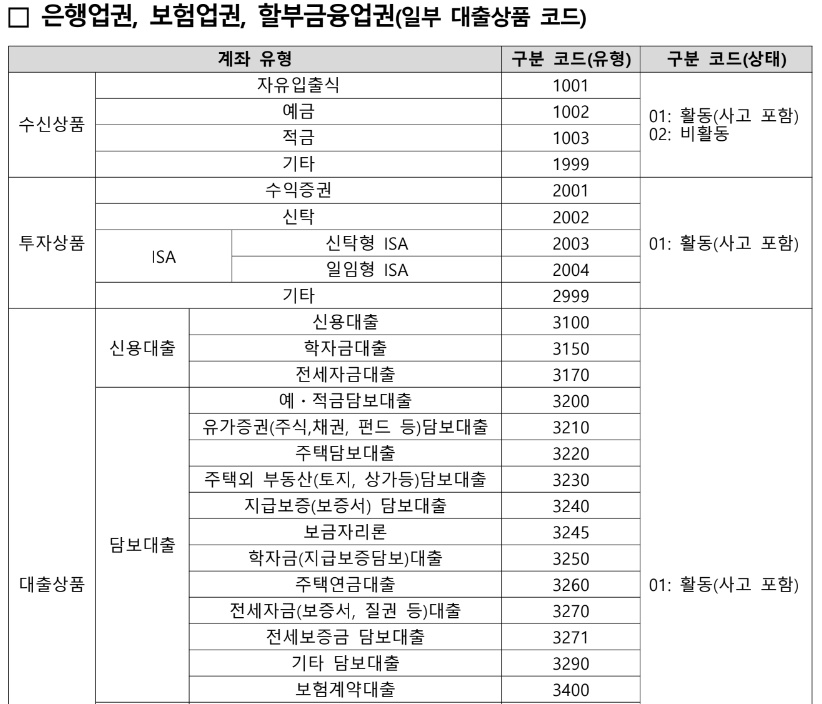

In [162]:
data4['prod_code']=data4['prod_code'].astype(int)
data4['prod_detail']=data4.prod_code.apply(lambda x: '입출금계좌' if x == 1001 else '예금계좌' if x==1002 else '적금계좌' if x==1003 else '기타수신계좌' if x==1999 else
                     '투자계좌' if x==2001 else '신용대출계좌' if (x>=3100)*(x<3200) else '담보대출계좌')

data4 = data4.groupby(['ID','prod_code','prod_detail']).size().reset_index()
data4.columns =['ID','prod_code','prod_detail','count']

data4.prod_detail.unique()

array(['입출금계좌', '투자계좌', '신용대출계좌', '예금계좌', '적금계좌', '담보대출계좌', '기타수신계좌'],
      dtype=object)

In [163]:
data_prod = pd.merge(data_use.drop('cluster',axis=1), data4.groupby(['ID','prod_detail'])['count'].sum().unstack().fillna(0), how='inner',on='ID')

In [164]:
data3 = data_prod.iloc[:,3:-7]

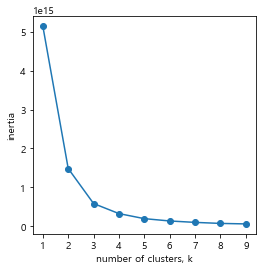

In [165]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data3)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [166]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data3))

kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(scaled_df)
data3['cluster'] = kmeans.labels_
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([223,  42, 239], dtype=int64))


In [167]:
data3.cluster.value_counts()

2    239
0    223
1     42
Name: cluster, dtype: int64

Feature-important

In [168]:
scaled_df.columns = data3.drop('cluster',axis=1).columns

In [169]:
X1 = scaled_df # DataFrame is an example to deliver the idea of features order

kms = KMeansInterp(n_clusters=3,ordered_feature_names=X1.columns.tolist(), feature_importance_method='wcss_min', # or 'unsup2sup'
).fit(X1.values)

In [170]:
data_prod['cluster']=data3['cluster']

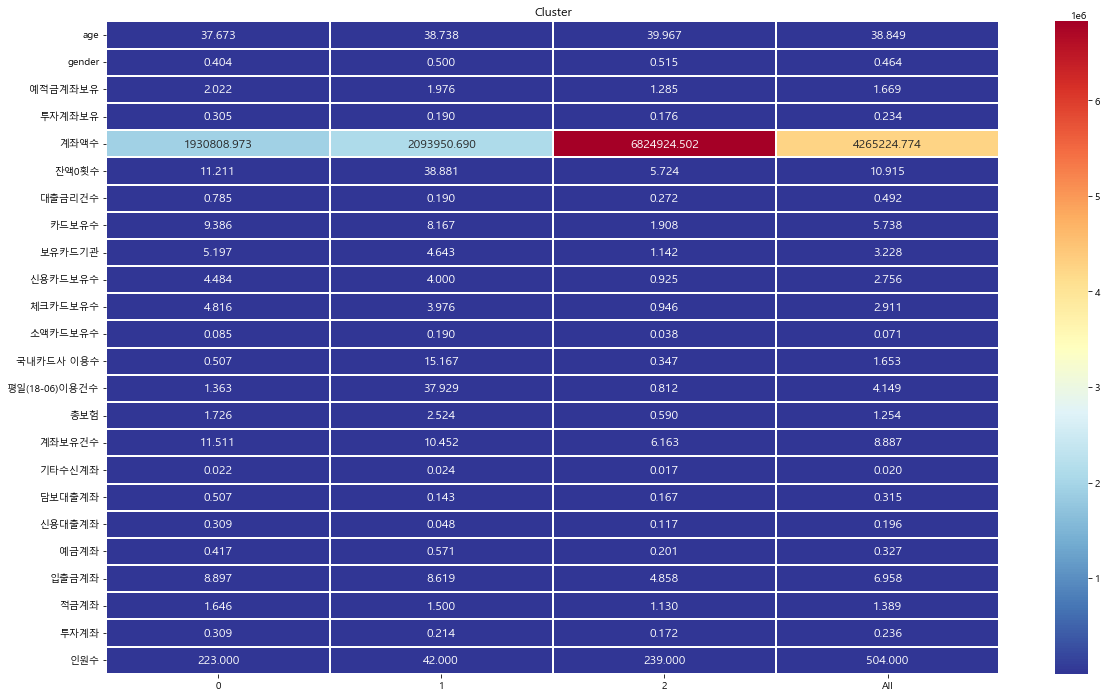

In [171]:
#cust_dummy = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv', 'pur6_bin'])
aa = data3.cluster.value_counts().reset_index()
aa.columns = ['cluster','인원수']
temp = data_prod.iloc[:,1:].groupby(['cluster']).mean()
temp = pd.merge(temp, aa, on='cluster').set_index('cluster')
temp_aa = pd.concat([temp.T, data_prod.iloc[:,1:].mean()],axis=1).fillna(data_prod.shape[0]).drop('cluster',axis=0)
temp_aa.columns = [0,1,2,'All']

plt.figure(figsize = (20, 12))
annot_kws = {'fontsize':12}
sns.heatmap(temp_aa,
           annot=True,
           fmt='.3f',
           linewidths=0.1,
           annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.title('Cluster')
plt.show()

### 사용 가능한 모든 기준을 활용한 군집화

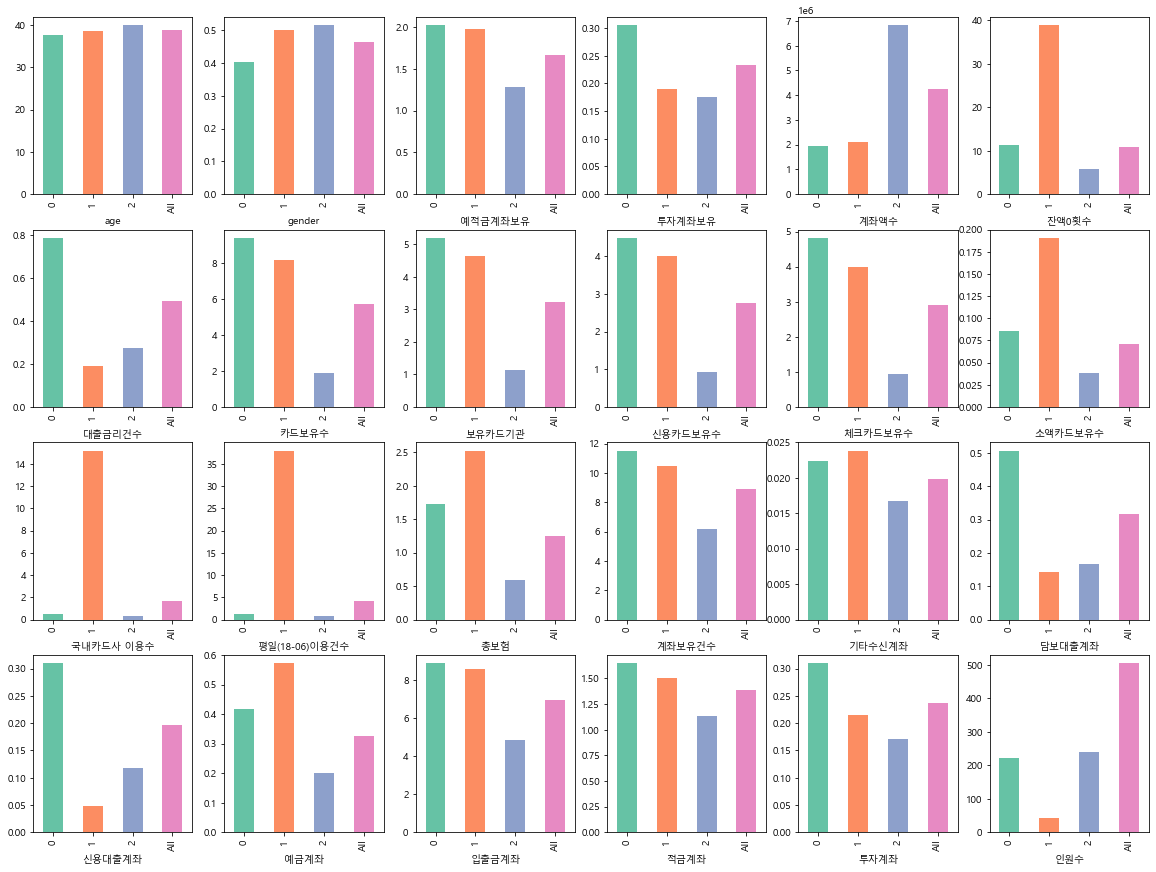

In [172]:
fig, axes = plt.subplots(4, 6, figsize=(20,15))
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(temp_aa.shape[0]):
    if i<6:
        ax = axes[0,i]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
    elif i<12:
        ax = axes[1,i-6]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
    elif i<18:
        ax = axes[2,i-12]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
    else:
        ax = axes[3,i-18]
        temp_aa.loc['{}'.format(temp_aa.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa.index[i])
        
parameters = {'axes.labelsize':10}
plt.rcParams.update(parameters)
plt.show()
# 소액카드 - 한도를 넘기는 경우가 많다

In [173]:
lst = list(np.arange(0,15))
lst.append(-1)
tempaa_1 = temp_aa.iloc[lst,:]

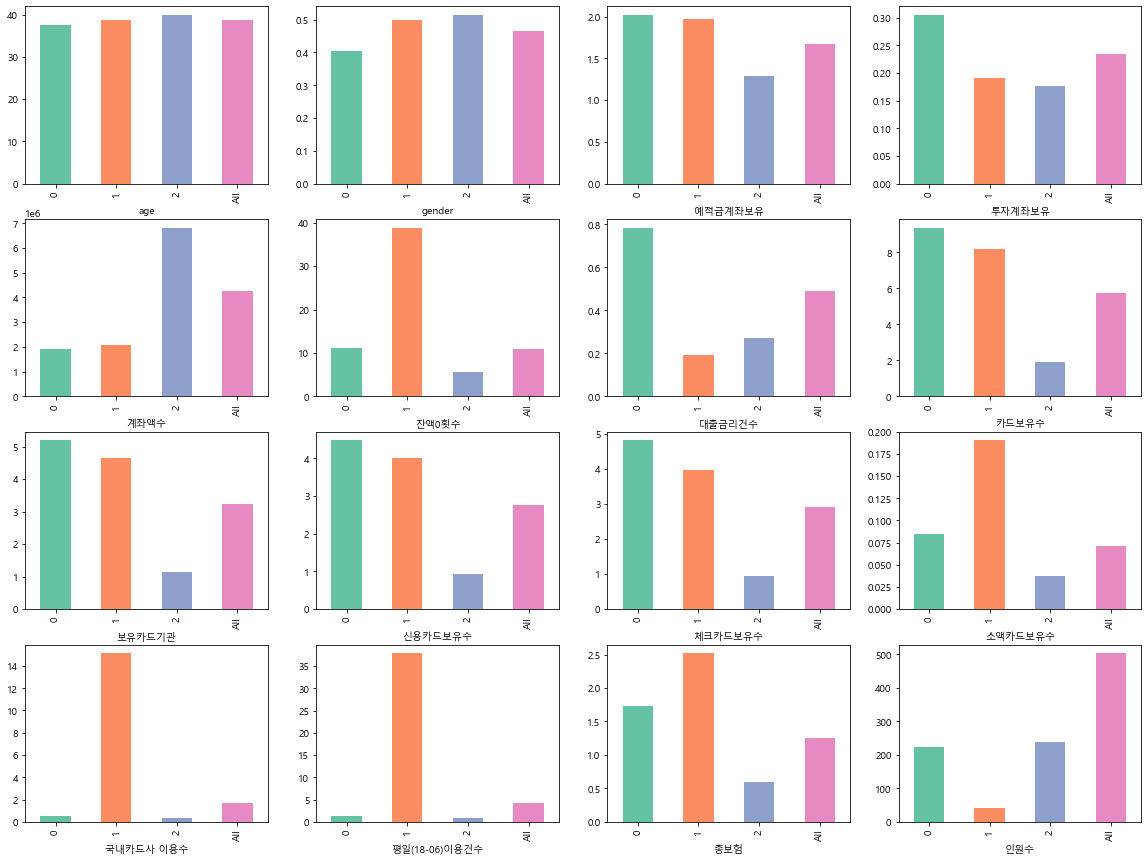

In [174]:
fig, axes = plt.subplots(4, 4, figsize=(20,15))
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(tempaa_1.shape[0]):
    if i<4:
        ax = axes[0,i]
        tempaa_1.loc['{}'.format(tempaa_1.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_1.index[i])
    elif i<8:
        ax = axes[1,i-4]
        tempaa_1.loc['{}'.format(tempaa_1.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_1.index[i])
    elif i<12:
        ax = axes[2,i-8]
        tempaa_1.loc['{}'.format(tempaa_1.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_1.index[i])
    else:
        ax = axes[3,i-12]
        tempaa_1.loc['{}'.format(tempaa_1.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_1.index[i])
        
parameters = {'axes.labelsize':10}
plt.rcParams.update(parameters)
plt.show()
# 소액카드 - 한도를 넘기는 경우가 많다

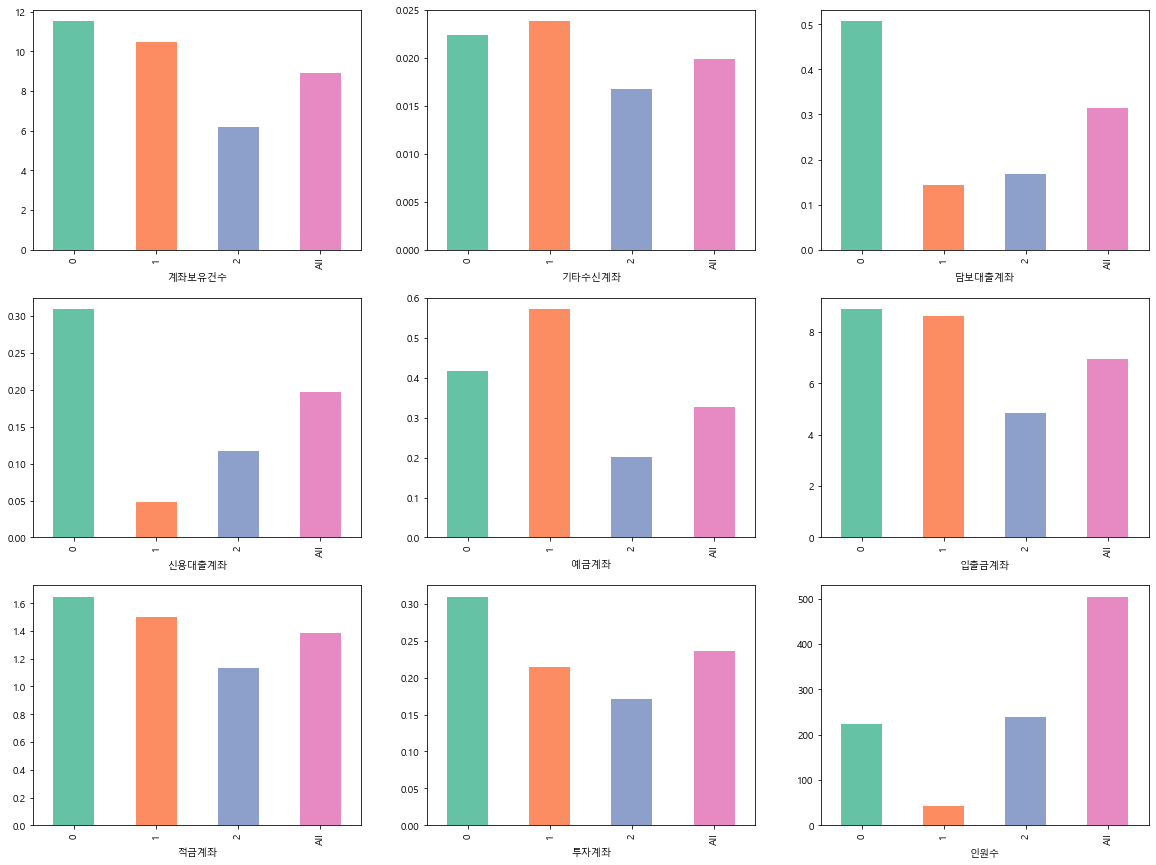

In [175]:
tempaa_2 = temp_aa.iloc[15:,:]
fig, axes = plt.subplots(3, 3, figsize=(20,15))
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(tempaa_2.shape[0]):
    if i<3:
        ax = axes[0,i]
        tempaa_2.loc['{}'.format(tempaa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_2.index[i])
    elif i<6:
        ax = axes[1,i-3]
        tempaa_2.loc['{}'.format(tempaa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_2.index[i])
    else:
        ax = axes[2,i-6]
        tempaa_2.loc['{}'.format(tempaa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=tempaa_2.index[i])
        
parameters = {'axes.labelsize':10}
plt.rcParams.update(parameters)
plt.show()
# 소액카드 - 한도를 넘기는 경우가 많다

---

In [183]:
# data_prod.columns = ['ID', 'age', 'gender', '예적금계좌보유', '투자계좌보유', '계좌액수', '잔액0횟수', '대출금리건수',
#        '카드보유수', '보유카드기관', '신용카드보유수', '체크카드보유수', '소액카드보유수', '국내카드사 이용수',
#        '평일(18-06)이용건수', '총보험', '계좌보유건수', '기타수신계좌', '담보대출계좌', '신용대출계좌', '예금계좌',
#        '입출금계좌', '적금계좌', '투자계좌', 'cluster_all']

# data_cluster = pd.merge(data, data4.groupby(['ID','prod_detail'])['count'].sum().unstack().fillna(0), how='inner', on='ID')

# data_cluster = pd.merge(data_cluster, data_prod[['ID','cluster_all']], how='left',on='ID').fillna(-1)

# data_cluster.drop('cluster',axis=1, inplace=True)

# data_cluster
# -1 -> 체리피커 예상 고객 군집
# 0  -> 계좌액수는 적지만 금융활동이 활발한 고객 군집
# 1  -> 특정 활동에 치우쳐 있는 고객 군집( 데이터의 오류일 가능성도 있음 )
# 2  -> 계좌액수는 크지만 금융활동이 전체 고객대비 적은 고객 군집

# data_cluster.to_csv('cluster_3729.csv', encoding="utf-8-sig")

---

![image.png](attachment:image.png )
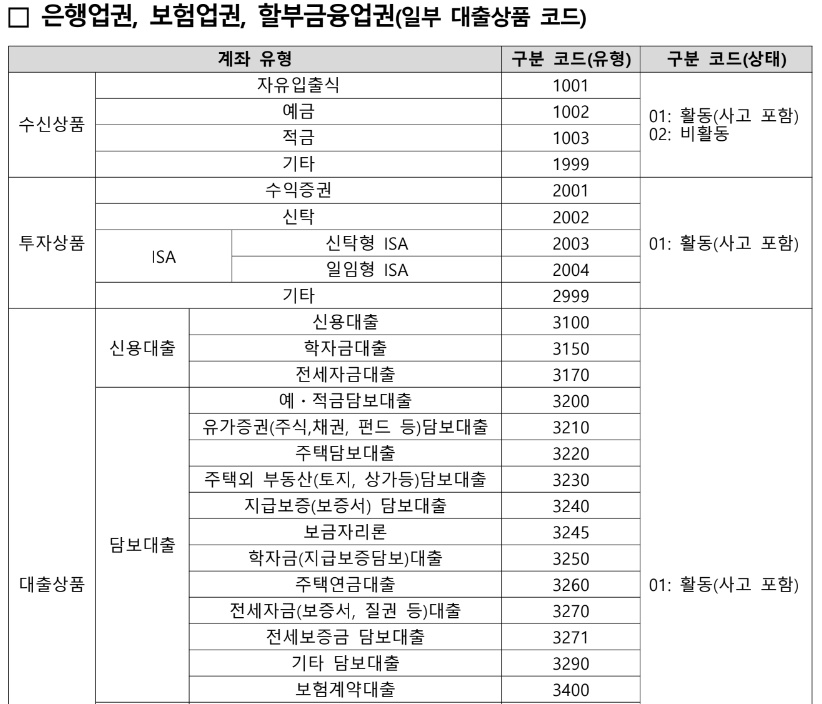

### 은행계좌의 종류에만 집중하여 군집을 나눴을 때

In [152]:
data_use_2 = data_prod.copy()
data_new = data_use_2.iloc[:,16:24]

In [153]:
data_new

,계좌보유건수,기타수신계좌,담보대출계좌,신용대출계좌,예금계좌,입출금계좌,적금계좌,투자계좌
0,11,0.0,0.0,0.0,0.0,11.0,0.0,1.0
1,4,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2,8,0.0,3.0,0.0,0.0,8.0,0.0,1.0
3,19,0.0,1.0,2.0,1.0,17.0,1.0,0.0
4,12,0.0,0.0,0.0,0.0,8.0,3.0,1.0
...,...,...,...,...,...,...,...,...
500,10,0.0,2.0,0.0,0.0,8.0,0.0,1.0
501,8,0.0,1.0,0.0,0.0,5.0,2.0,0.0
502,11,0.0,0.0,0.0,0.0,8.0,3.0,0.0
503,9,0.0,1.0,0.0,0.0,6.0,2.0,0.0


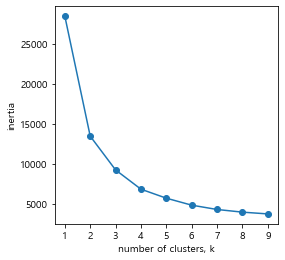

In [154]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_new)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [155]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data_new))

kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(scaled_df)
data_new['cluster'] = kmeans.labels_
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([205,  90, 210], dtype=int64))


In [156]:
data_new.cluster.value_counts()

2    210
0    205
1     90
Name: cluster, dtype: int64

Feature-important

In [157]:
scaled_df.columns = data_new.drop('cluster',axis=1).columns

In [158]:
X1 = scaled_df # DataFrame is an example to deliver the idea of features order

kms = KMeansInterp(n_clusters=4,ordered_feature_names=X1.columns.tolist(), feature_importance_method='wcss_min', # or 'unsup2sup'
).fit(X1.values)

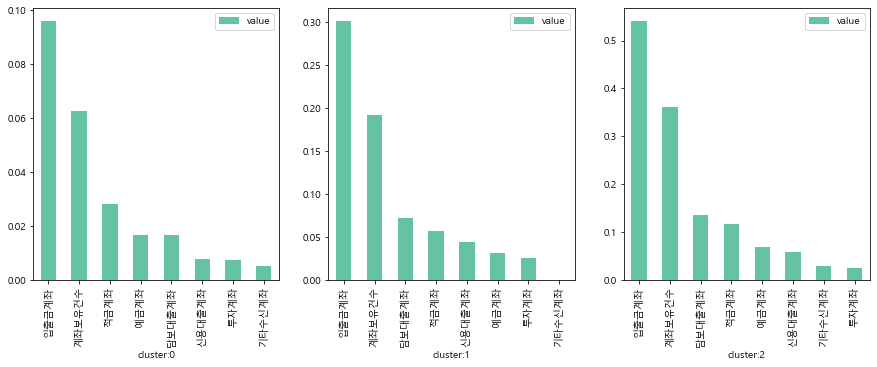

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(3):
    ax = axes[i]
    aa = pd.DataFrame(kms.feature_importances_[i][:10])
    aa.columns = ['feature','value']
    aa=aa.set_index('feature')
    aa.plot.bar(ax=ax, color = colors)
    ax.set(xlabel='cluster:{}'.format(i))
plt.show()

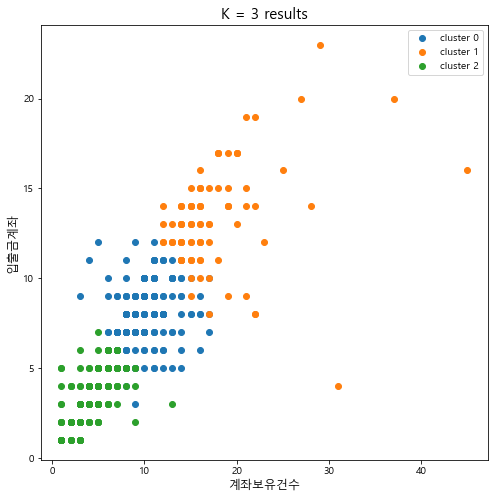

In [160]:
k=3
plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(data_new.loc[data_new['cluster'] == i, '계좌보유건수'], data_new.loc[data_new['cluster'] == i, '입출금계좌'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('계좌보유건수', size = 12)
plt.ylabel('입출금계좌', size = 12)
plt.show()

In [161]:
data_use_2['cluster']=data_new['cluster']

In [162]:
data_use_new = data_use_2.iloc[:,[0,16,17,18,19,20,21,22,23,24]]

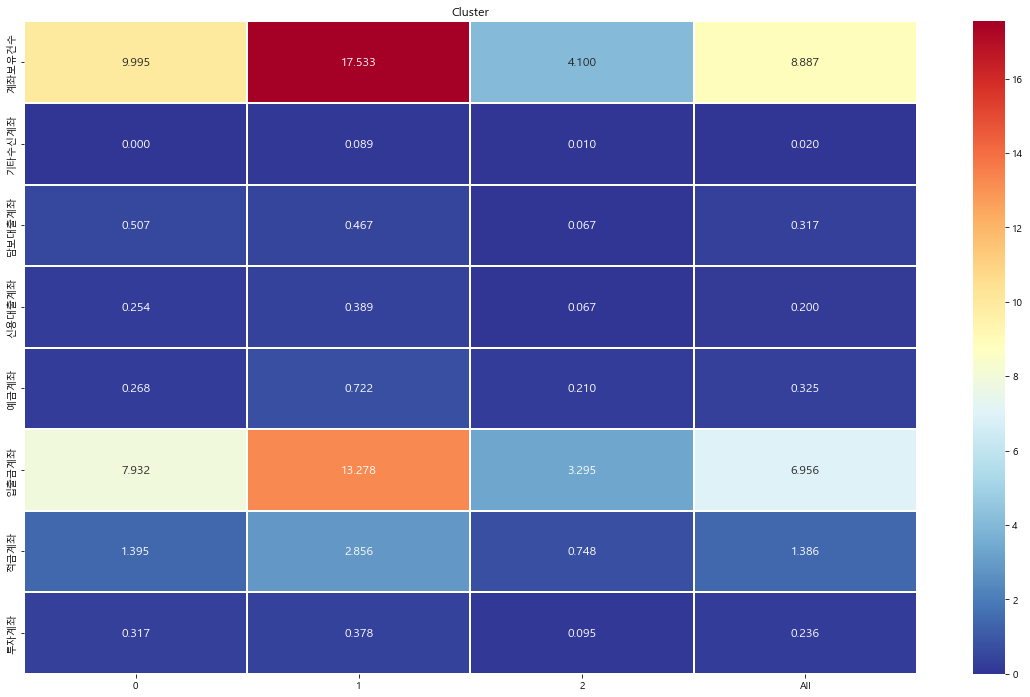

In [163]:
#cust_dummy = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv', 'pur6_bin'])
aa_2 = data_new.cluster.value_counts().reset_index()
aa_2.columns = ['cluster','인원수']
temp_2 = data_use_new.iloc[:,1:].groupby(['cluster']).mean()
temp_2 = pd.merge(temp_2, aa_2, on='cluster').set_index('cluster')
temp_aa_2 = pd.concat([temp_2.T, data_use_new.iloc[:,1:].mean()],axis=1).fillna(data_use_new.shape[0]).drop('cluster',axis=0)
temp_aa_2.columns = [0,1,2,'All']

plt.figure(figsize = (20, 12))
annot_kws = {'fontsize':12}
sns.heatmap(temp_aa_2.drop('인원수'),
           annot=True,
           fmt='.3f',
           linewidths=0.1,
           annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.title('Cluster')
plt.show()

### 연결된 금융자산 카텍고리만을 기준으로 활용한 군집화

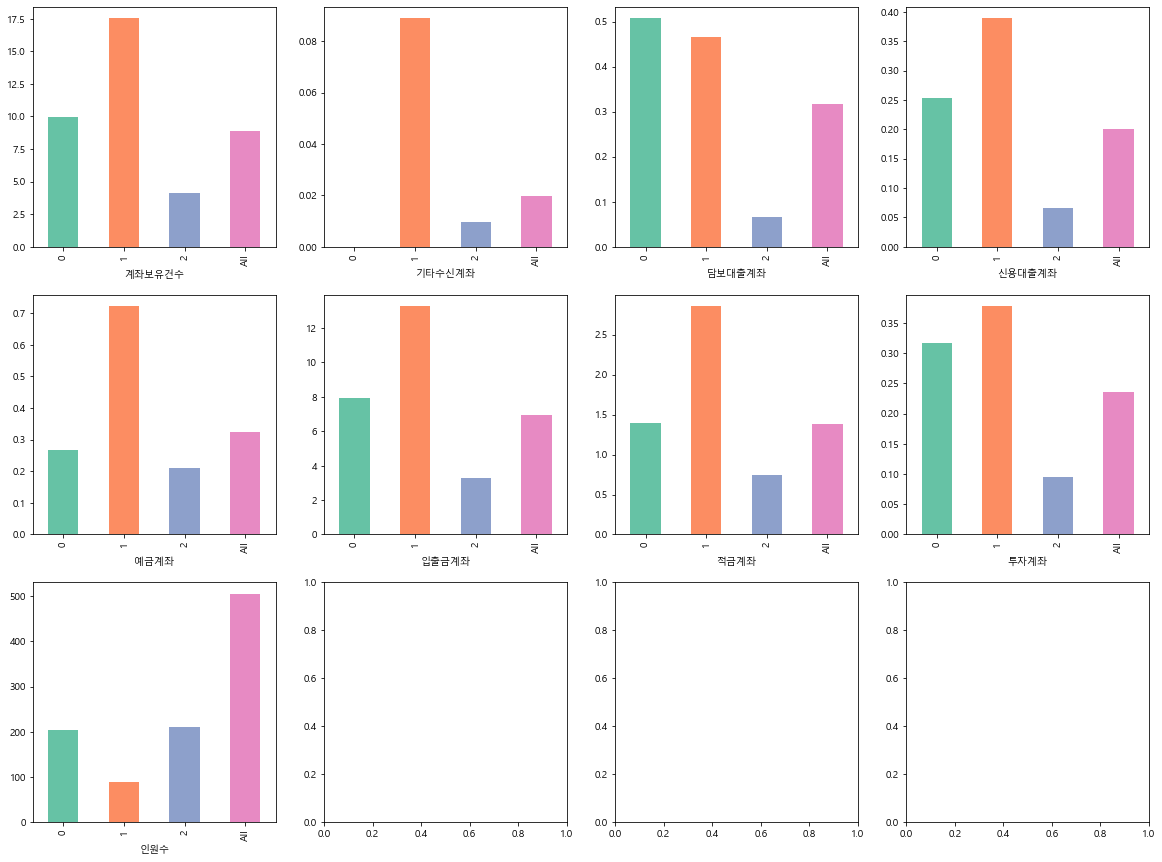

In [164]:
fig, axes = plt.subplots(3, 4, figsize=(20,15))
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(temp_aa_2.shape[0]):
    if i<4:
        ax = axes[0,i]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
    elif i<8:
        ax = axes[1,i-4]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
    else:
        ax = axes[2,i-8]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
        
parameters = {'axes.labelsize':10}
plt.rcParams.update(parameters)
plt.show()

<Figure size 1440x1080 with 0 Axes>

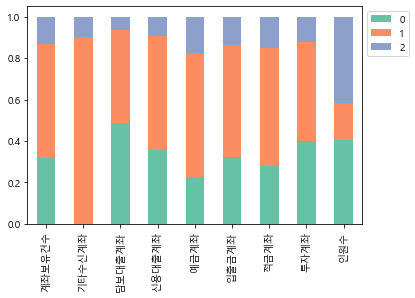

In [165]:
temp_stack = temp_aa_2.copy()
temp_stack['All'] = temp_stack.drop('All',axis=1).sum(axis=1)

plt.figure(figsize=(20, 15))
temp_stack.divide(temp_stack['All'],axis=0).drop('All',axis=1).plot.bar(stacked=True,color=colors)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 카드사용 카테고리만을 기준으로 활용한 군집화(카드내역에 카테고리 컬럼이 존재하는 고객들을 대상으로..)

In [4]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT mut.BDAY_CUST_ID ,mcac.NAME , COUNT(*) FROM MD_CARD_APPROVAL_CATEGORY mcac , MD_CARD_APPROVAL_DOMESTIC_HIST mcadh , MD_CARD_CARDS mcc , MD_USER_TOKEN mut 
            WHERE mcac.ID = mcadh.CATEGORY_ID AND mcc.ID=mcadh.CARD_CARDS_ID AND mcc.TOKEN_ID = mut.ID
            GROUP BY mut.BDAY_CUST_ID, mcac.NAME;
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            card_all = cur.fetchall()

I'm running
1559
I'm running
1560


In [32]:
card_all

,ID,card_cat,count
0,20,쇼핑,6
1,20,식비,1
2,20,주거/통신,1
3,20,편의점/마트/잡화,1
4,109,쇼핑,7
...,...,...,...
420,7475,편의점/마트/잡화,1
421,7477,교통/자동차,5
422,7477,쇼핑,2
423,7477,식비,1


In [5]:
card_all = pd.DataFrame(card_all)
card_all.columns = ['ID','card_cat','count']

In [7]:
card_category = pd.pivot_table(data= card_all, index='ID', columns='card_cat', values='count', aggfunc='sum').fillna(0)

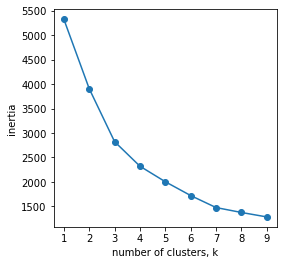

In [10]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(card_category)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [12]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(card_category))

kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(scaled_df)
card_category['cluster'] = kmeans.labels_
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([37, 75,  5], dtype=int64))


In [13]:
card_category.cluster.value_counts()

1    75
0    37
2     5
Name: cluster, dtype: int64

Feature-important

In [14]:
scaled_df.columns = card_category.drop('cluster',axis=1).columns

In [15]:
X1 = scaled_df # DataFrame is an example to deliver the idea of features order

kms = KMeansInterp(n_clusters=4,ordered_feature_names=X1.columns.tolist(), feature_importance_method='wcss_min', # or 'unsup2sup'
).fit(X1.values)

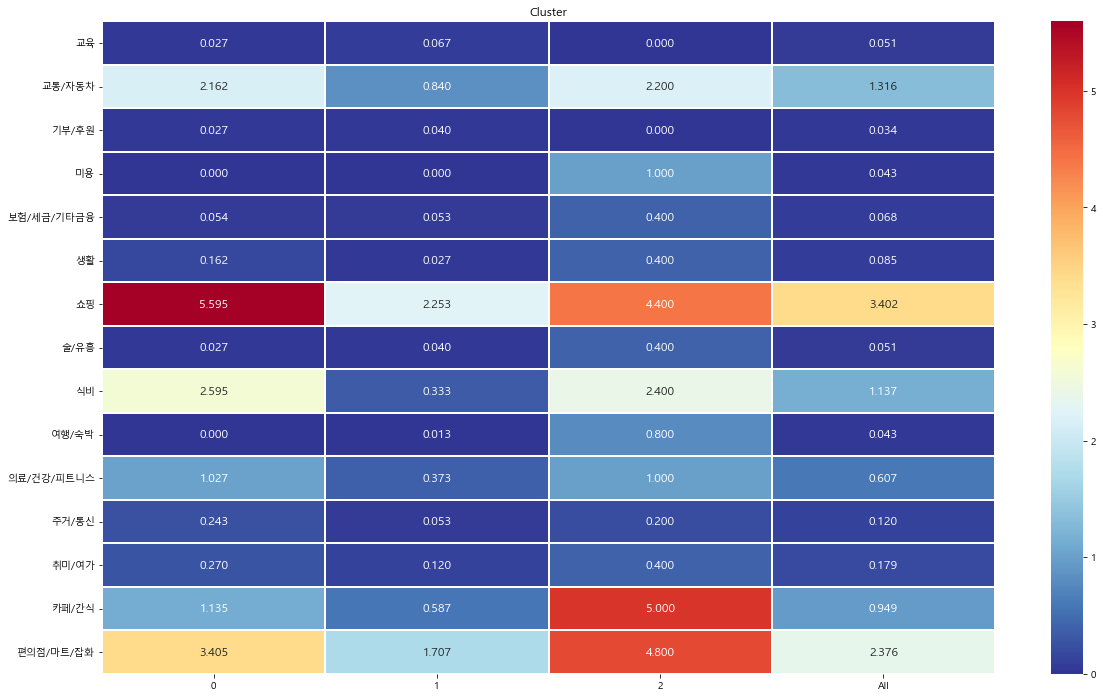

In [25]:
#cust_dummy = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv', 'pur6_bin'])
aa_2 = card_category.cluster.value_counts().reset_index()
aa_2.columns = ['cluster','인원수']
temp_2 = card_category.groupby(['cluster']).mean()
temp_2 = pd.merge(temp_2, aa_2, on='cluster').set_index('cluster')
temp_aa_2 = pd.concat([temp_2.T, card_category.mean()],axis=1).fillna(card_category.mean().shape[0]).drop('cluster',axis=0)
temp_aa_2.columns = [0,1,2,'All']

plt.figure(figsize = (20, 12))
annot_kws = {'fontsize':12}
sns.heatmap(temp_aa_2.drop('인원수'),
           annot=True,
           fmt='.3f',
           linewidths=0.1,
           annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.title('Cluster')
plt.show()

### 카드사용 카테고리만을 기준으로 활용한 군집화

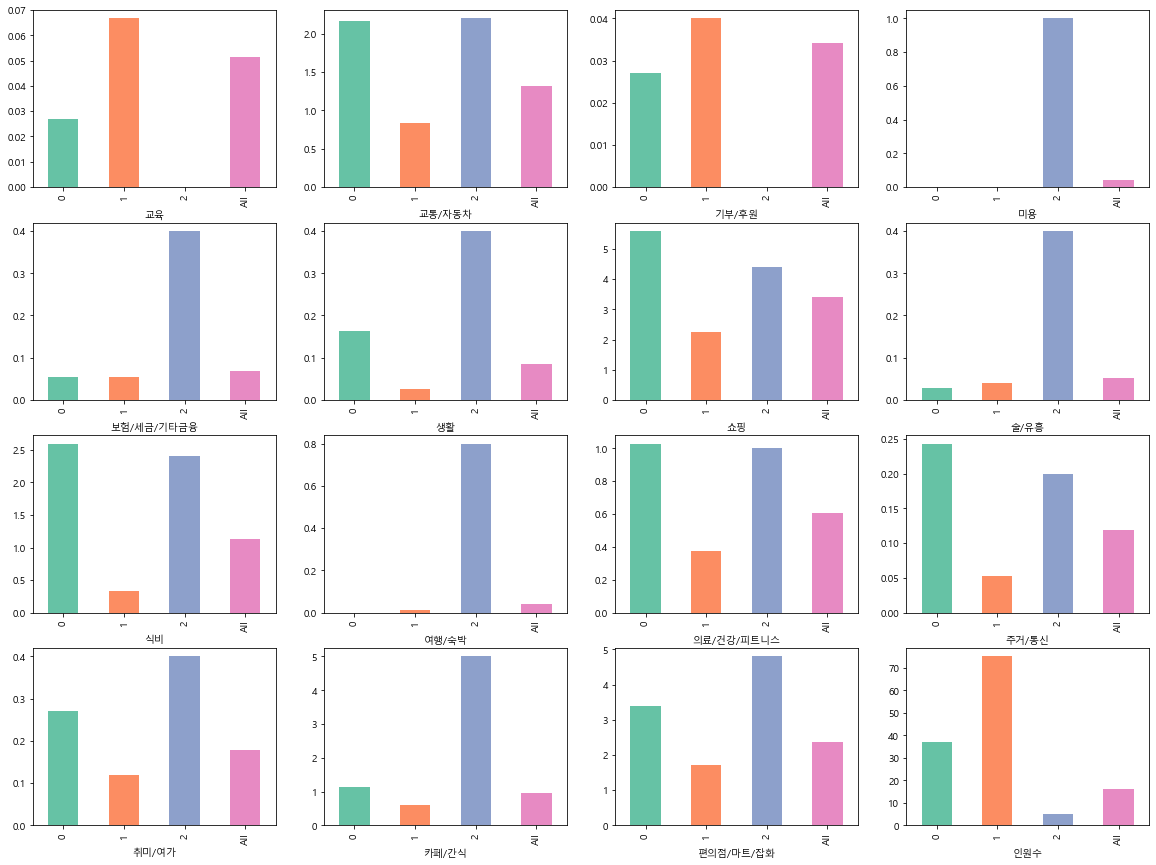

In [31]:
fig, axes = plt.subplots(4, 4, figsize=(20,15))
colors=cm.get_cmap('Set2')(np.arange(7))

for i in range(temp_aa_2.shape[0]):
    if i<4:
        ax = axes[0,i]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
    elif i<8:
        ax = axes[1,i-4]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
    elif i<12:
        ax = axes[2,i-8]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
    else:
        ax = axes[3,i-12]
        temp_aa_2.loc['{}'.format(temp_aa_2.index[i])].plot.bar(ax=ax, color = colors)
        ax.set(xlabel=temp_aa_2.index[i])
        
parameters = {'axes.labelsize':10}
plt.rcParams.update(parameters)
plt.show()

In [134]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT TRUNCATE((TO_DAYS(NOW()) - TO_DAYS(BIRTH_DD)) / 365, 0)+1 AS AGE, bc.ID
            FROM MD_CARD_APPROVAL_DOMESTIC_HIST mcadh , MD_CARD_CARDS mcc , MD_USER_TOKEN mut , BDAY_CUST bc 
            WHERE mcc.ID=mcadh.CARD_CARDS_ID AND mcc.TOKEN_ID = mut.ID AND mut.BDAY_CUST_ID = bc.ID
            AND mcadh.APPROVED_DTIME BETWEEN (SELECT DATE_SUB(NOW(), INTERVAL 7 DAY)) AND NOW();
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            card_week = cur.fetchall()

I'm running
1559
I'm running
1560


In [135]:
# 최근 일주일 기준 주간 평균 카드 사용량
card_week = pd.DataFrame(card_week)
card_week.columns = ['age', 'ID']

card_week['age'] = card_week.age.apply(lambda x: '20대 'if 20<=x<30 else '30대' if 30<=x<40 else '40대' if 40<=x<50 else '50대' if 50<=x<60 
                else '60대' if 60<=x<70 else '70대' if 70<=x<80 else '80대')
card_week['count']=1

card_count = card_week.groupby('ID')['count'].sum().reset_index()
card_age = card_week.groupby('ID')['age'].first().reset_index()
card_week = pd.merge(card_count, card_age, on='ID').groupby('age')['count'].mean().reset_index()
card_week

,age,count
0,20대,9.441176
1,30대,8.892857
2,40대,11.272727
3,50대,12.285714
4,60대,16.000000
5,80대,6.000000


In [136]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT TRUNCATE((TO_DAYS(NOW()) - TO_DAYS(BIRTH_DD)) / 365, 0)+1 AS AGE, bc.ID
            FROM MD_CARD_APPROVAL_DOMESTIC_HIST mcadh , MD_CARD_CARDS mcc , MD_USER_TOKEN mut , BDAY_CUST bc 
            WHERE mcc.ID=mcadh.CARD_CARDS_ID AND mcc.TOKEN_ID = mut.ID AND mut.BDAY_CUST_ID = bc.ID
            AND mcadh.APPROVED_DTIME BETWEEN (SELECT DATE_SUB(NOW(), INTERVAL 4 WEEK)) AND NOW();
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            card_month = cur.fetchall()

I'm running
1559
I'm running
1560


In [137]:
# 최근 한달 기준 주간 평균 카드 사용량
card_month = pd.DataFrame(card_month)
card_month.columns = ['age', 'ID']

card_month['age'] = card_month.age.apply(lambda x: '20대 'if 20<=x<30 else '30대' if 30<=x<40 else '40대' if 40<=x<50 else '50대' if 50<=x<60 
                else '60대' if 60<=x<70 else '70대' if 70<=x<80 else '80대')
card_month['count']=1

card_count = card_month.groupby('ID')['count'].sum().reset_index()
card_age = card_month.groupby('ID')['age'].first().reset_index()
card_month = pd.merge(card_count, card_age, on='ID').groupby('age')['count'].mean().reset_index()
card_month['count'] = card_month['count']/4
card_month

,age,count
0,20대,10.094203
1,30대,9.500000
2,40대,9.562500
3,50대,9.250000
4,60대,9.166667
5,70대,0.250000
6,80대,5.916667


In [138]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT TRUNCATE((TO_DAYS(NOW()) - TO_DAYS(BIRTH_DD)) / 365, 0)+1 AS AGE, bc.ID
            FROM MD_CARD_APPROVAL_DOMESTIC_HIST mcadh , MD_CARD_CARDS mcc , MD_USER_TOKEN mut , BDAY_CUST bc 
            WHERE mcc.ID=mcadh.CARD_CARDS_ID AND mcc.TOKEN_ID = mut.ID AND mut.BDAY_CUST_ID = bc.ID
            AND mcadh.APPROVED_DTIME BETWEEN (SELECT DATE_SUB(NOW(), INTERVAL 13 WEEK)) AND NOW();
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            card_3month = cur.fetchall()

I'm running
1559
I'm running
1560


In [139]:
# 최근 세달 기준 주간 평균 카드 사용량
card_3month = pd.DataFrame(card_3month)
card_3month.columns = ['age', 'ID']

card_3month['age'] = card_3month.age.apply(lambda x: '20대 'if 20<=x<30 else '30대' if 30<=x<40 else '40대' if 40<=x<50 else '50대' if 50<=x<60 
                else '60대' if 60<=x<70 else '70대' if 70<=x<80 else '80대')
card_3month['count']=1

card_count = card_3month.groupby('ID')['count'].sum().reset_index()
card_age = card_3month.groupby('ID')['age'].first().reset_index()
card_3month = pd.merge(card_count, card_age, on='ID').groupby('age')['count'].mean().reset_index()
card_3month['count'] = card_3month['count']/13
card_3month

,age,count
0,20대,11.111227
1,30대,10.324448
2,40대,11.746853
3,50대,11.179971
4,60대,8.979021
5,70대,0.076923
6,80대,9.948718


In [140]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT TRUNCATE((TO_DAYS(NOW()) - TO_DAYS(BIRTH_DD)) / 365, 0)+1 AS AGE, bc.ID
            FROM MD_CARD_APPROVAL_DOMESTIC_HIST mcadh , MD_CARD_CARDS mcc , MD_USER_TOKEN mut , BDAY_CUST bc 
            WHERE mcc.ID=mcadh.CARD_CARDS_ID AND mcc.TOKEN_ID = mut.ID AND mut.BDAY_CUST_ID = bc.ID
            AND mcadh.APPROVED_DTIME BETWEEN (SELECT DATE_SUB(NOW(), INTERVAL 26 WEEK)) AND NOW();
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            card_6month = cur.fetchall()

I'm running
1559
I'm running
1560


In [141]:
# 최근 6달 기준 주간 평균 카드 사용량
card_6month = pd.DataFrame(card_6month)
card_6month.columns = ['age', 'ID']

card_6month['age'] = card_6month.age.apply(lambda x: '20대 'if 20<=x<30 else '30대' if 30<=x<40 else '40대' if 40<=x<50 else '50대' if 50<=x<60 
                else '60대' if 60<=x<70 else '70대' if 70<=x<80 else '80대')
card_6month['count']=1

card_count = card_6month.groupby('ID')['count'].sum().reset_index()
card_age = card_6month.groupby('ID')['age'].first().reset_index()
card_6month = pd.merge(card_count, card_age, on='ID').groupby('age')['count'].mean().reset_index()
card_6month['count'] = card_6month['count']/26
card_6month

,age,count
0,20대,6.709231
1,30대,7.272929
2,40대,7.987637
3,50대,7.626996
4,60대,5.554487
5,70대,0.038462
6,80대,8.076923


In [142]:
with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_pkey=mypkey,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        con = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
        df = ["1559","1560"] # get To_Date, From_Date
        ACCOUNT_LIST =[]
        for item in df:
            print("I'm running")
            print(item)
            sql = """
            SELECT TRUNCATE((TO_DAYS(NOW()) - TO_DAYS(BIRTH_DD)) / 365, 0)+1 AS AGE, bc.ID
            FROM MD_CARD_APPROVAL_DOMESTIC_HIST mcadh , MD_CARD_CARDS mcc , MD_USER_TOKEN mut , BDAY_CUST bc 
            WHERE mcc.ID=mcadh.CARD_CARDS_ID AND mcc.TOKEN_ID = mut.ID AND mut.BDAY_CUST_ID = bc.ID
            AND mcadh.APPROVED_DTIME BETWEEN (SELECT DATE_SUB(NOW(), INTERVAL 52 WEEK)) AND NOW();
            """.format(str(item[0]))
            cur = con.cursor()
            cur.execute(sql)
            card_1year = cur.fetchall()

I'm running
1559
I'm running
1560


In [143]:
# 최근 6달 기준 주간 평균 카드 사용량
card_1year = pd.DataFrame(card_1year)
card_1year.columns = ['age', 'ID']

card_1year['age'] = card_1year.age.apply(lambda x: '20대 'if 20<=x<30 else '30대' if 30<=x<40 else '40대' if 40<=x<50 else '50대' if 50<=x<60 
                else '60대' if 60<=x<70 else '70대' if 70<=x<80 else '80대')
card_1year['count']=1

card_count = card_1year.groupby('ID')['count'].sum().reset_index()
card_age = card_1year.groupby('ID')['age'].first().reset_index()
card_1year = pd.merge(card_count, card_age, on='ID').groupby('age')['count'].mean().reset_index()
card_1year['count'] = card_1year['count']/52
card_1year

,age,count
0,20대,4.288209
1,30대,5.160855
2,40대,5.385290
3,50대,5.127493
4,60대,4.014423
5,70대,0.019231
6,80대,5.865385
